<a href="https://colab.research.google.com/github/TonyRHo32/ABR-Mentoring/blob/master/ABR_Mentoring_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABR mentoring 3주차

## 1.데이터 읽어오기

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
name_file='/content/data_lab1.txt'
columns=['x','y']

data_in = pd.read_csv(name_file, sep=' ',names=columns)

In [98]:
type(data_in)

pandas.core.frame.DataFrame

In [99]:
data_in

,x,y
0,0.000000,0.685785
1,0.020202,1.671735
2,0.040404,2.406276
3,0.060606,0.375167
4,0.080808,4.355949
...,...,...
95,1.919192,19.975148
96,1.939394,20.358975
97,1.959596,22.849086
98,1.979798,19.977494


In [0]:
x= np.asarray(data_in['x'])

In [101]:
x.shape

(100,)

In [102]:
x

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [0]:
x= np.asarray(data_in['x']).reshape((-1,1))
y= np.asarray(data_in['y']).reshape((-1,1))

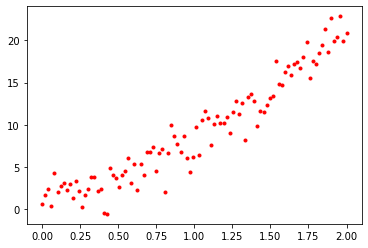

In [104]:
plt.plot(x,y,'r.')
plt.show()

In [0]:
x=np.column_stack((np.ones_like(x),x))

In [106]:
x[:10]

array([[1.        , 0.        ],
       [1.        , 0.02020202],
       [1.        , 0.04040404],
       [1.        , 0.06060606],
       [1.        , 0.08080808],
       [1.        , 0.1010101 ],
       [1.        , 0.12121212],
       [1.        , 0.14141414],
       [1.        , 0.16161616],
       [1.        , 0.18181818]])

I : 입력데이터의 개수

N : 입력 데이터의 차원

x의 shape는 I, N+1

y의 shape는 I,1

theta의 shape는 N+1,1

In [0]:
I= x.shape[0]
N= x.shape[1]-1

## 2. 배치 경사 하강법


In [0]:
# BGD

#파라미터 랜덤으로 초기화
theta = np.random.rand(N+1,1)

#학습률, 에포크 수(반복횟수)
alpha= 0.001
max_epoch = 10000

In [0]:
# 메인 루프
for epoch in range(1,max_epoch+1):
  theta_tp=np.transpose(theta)
  for n in range(0,N+1):
     for i in range(1,I):
       gradient = (np.matmul(theta_tp, x[i])-y[i]) * x[i,n]
       theta[n]=theta[n] -alpha * gradient

In [110]:
theta

array([[-1.12832519],
       [10.39739257]])

In [0]:
def hypo(theta, t):
  return theta[0] + theta[1] * t

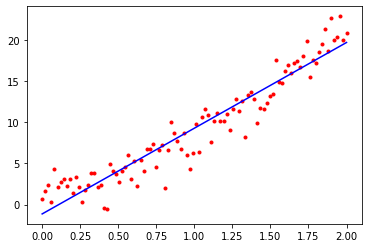

In [112]:
t=x[:,1]

plt.plot(t,y,'r.')

plt.plot(t, hypo(theta,t),'b-')

plt.show()

In [0]:
theta_BGD = theta

## 3. 확률적 경사 하강법
random.randrange() 로 i 랜덤으로 골라서 쓰기
## 4. 최소제곱법
transpose inverse
## 5. 3가지 직선 다같이 그리기

In [0]:
from random import randint

In [0]:
# SGD

#파라미터 랜덤으로 초기화
theta = np.random.rand(N+1,1)

#학습률, 에포크 수(반복횟수)
alpha= 0.001
max_epoch = 100

In [0]:
# 메인 루프
for epoch in range(1,max_epoch+1):
  theta_tp=np.transpose(theta)
  for n in range(0,N+1):
     i = randint(0, I-1)
     gradient = (np.matmul(theta_tp, x[i])-y[i]) * x[i,n]
     theta[n]=theta[n] -alpha * gradient

In [117]:
theta_BGD

array([[-1.12832519],
       [10.39739257]])

In [118]:
theta

array([[1.29626037],
       [1.97072709]])

In [0]:
def hypo(theta, t):
  return theta[0] + theta[1] * t

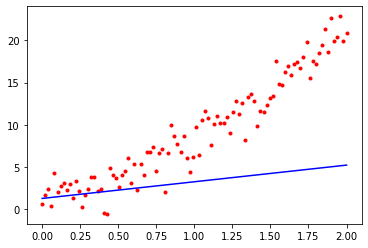

In [120]:
t=x[:,1]

plt.plot(t,y,'r.')

plt.plot(t, hypo(theta,t),'b-')

plt.show()

In [0]:
theta_SGD = theta

4.최소제곱법

In [0]:
theta_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.transpose(x)),y)

theta_OLS_2 = np.linalg.inv(x.T @ x) @ x.T @ y

5.세가지 표 같이그리기

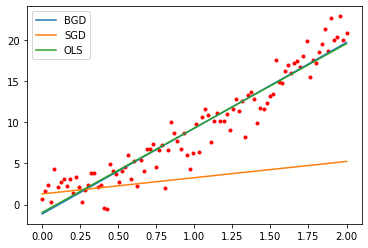

In [123]:
plt.plot(t,y,'r.')
plt.plot(t, hypo(theta_BGD,t), label='BGD')
plt.plot(t, hypo(theta_SGD,t), label='SGD')
plt.plot(t, hypo(theta_OLS,t), label='OLS')
plt.legend()
plt.show()